In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
# Grafik ayarları
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

In [2]:
data_2015 = pd.read_csv("2015.csv")
data_2016 = pd.read_csv("2016.csv")
data_2017 = pd.read_csv("2017.csv")

In [66]:
df = pd.concat([data_2015, data_2016, data_2017], ignore_index=True)

In [67]:
df.head()

,Country,Region,Rank,Score,Standard Error,Economy,Social Support,Health,Freedom,Trust,...,Upper Confidence Interval,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Trust..Government.Corruption.,Dystopia.Residual
0,Switzerland,Western Europe,1.0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Iceland,Western Europe,2.0,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Denmark,Western Europe,3.0,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Norway,Western Europe,4.0,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Canada,North America,5.0,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 470 entries, 0 to 469
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        470 non-null    object 
 1   Region                         315 non-null    object 
 2   Rank                           315 non-null    float64
 3   Score                          315 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy                        315 non-null    float64
 6   Social Support                 315 non-null    float64
 7   Health                         315 non-null    float64
 8   Freedom                        470 non-null    float64
 9   Trust                          315 non-null    float64
 10  Generosity                     470 non-null    float64
 11  Dystopia Residual              315 non-null    float64
 12  Year                           315 non-null    flo

In [59]:
# 6. Puan farklarını hesaplayalım
pivot = df_all.pivot_table(index='Country', columns='Year', values='Score')
pivot['Change'] = pivot[2016] - pivot[2015]

In [60]:
# En çok artış gösteren ülkeler
top_increase = pivot.sort_values('Change', ascending=False).head(10)

In [61]:
# En çok düşüş yaşayan ülkeler
top_decrease = pivot.sort_values('Change').head(10)

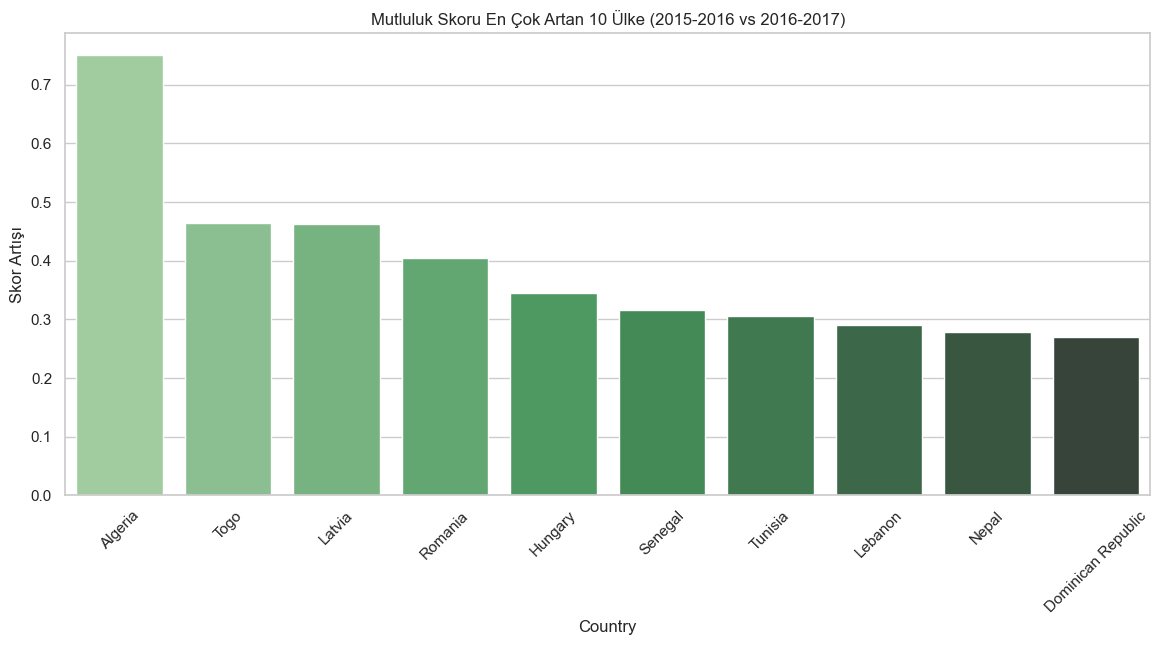

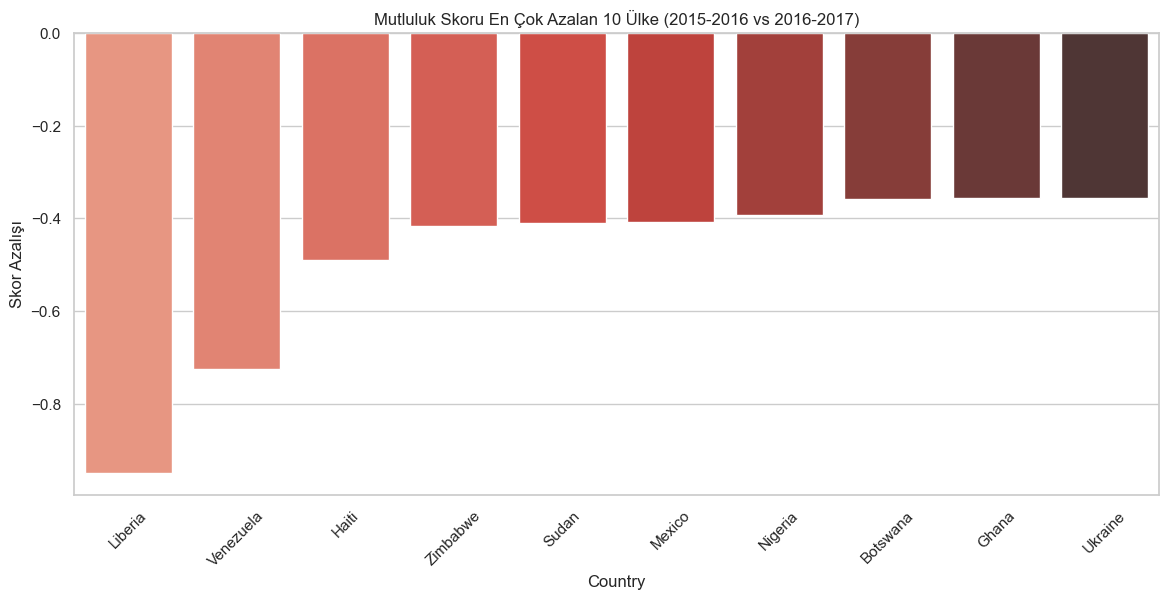

In [62]:
# 7. Görselleştirme: En çok artan ve azalan ülkeler
plt.figure(figsize=(14,6))
sns.barplot(data=top_increase.reset_index(), x='Country', y='Change',hue='Country', palette='Greens_d')
plt.title("Mutluluk Skoru En Çok Artan 10 Ülke (2015-2016 vs 2016-2017)")
plt.xticks(rotation=45)
plt.ylabel("Skor Artışı")
plt.show()

plt.figure(figsize=(14,6))
sns.barplot(data=top_decrease.reset_index(), x='Country', y='Change',hue='Country', palette='Reds_d')
plt.title("Mutluluk Skoru En Çok Azalan 10 Ülke (2015-2016 vs 2016-2017)")
plt.xticks(rotation=45)
plt.ylabel("Skor Azalışı")
plt.show()

In [63]:
# 8. Her faktörde en yüksek ülkeleri bulalım (2016 yılı için)
factors = ['Economy', 'Social Support', 'Health', 'Freedom', 'Trust', 'Generosity']
top_factors = {}

for factor in factors:
    top_country = data_2016.loc[data_2016[factor].idxmax()]
    top_factors[factor] = (top_country['Country'], top_country[factor])

In [64]:
# Sonuçları göster
print("2016'da faktör bazlı en yüksek skora sahip ülkeler:")
for k, v in top_factors.items():
    print(f"{k}: {v[0]} ({v[1]:.2f})")

2016'da faktör bazlı en yüksek skora sahip ülkeler:
Economy: Qatar (1.82)
Social Support: Iceland (1.18)
Health: Hong Kong (0.95)
Freedom: Uzbekistan (0.61)
Trust: Rwanda (0.51)
Generosity: Myanmar (0.82)


In [65]:
# 9. Genel mutluluk sıralaması (2016)
top_10_2016 = data_2016.sort_values('Score', ascending=False).head(10)
print("\n2016 yılı genel mutluluk skoru en yüksek 10 ülke:")
print(top_10_2016[['Country', 'Score']])


2016 yılı genel mutluluk skoru en yüksek 10 ülke:
       Country  Score
0      Denmark  7.526
1  Switzerland  7.509
2      Iceland  7.501
3       Norway  7.498
4      Finland  7.413
5       Canada  7.404
6  Netherlands  7.339
7  New Zealand  7.334
8    Australia  7.313
9       Sweden  7.291


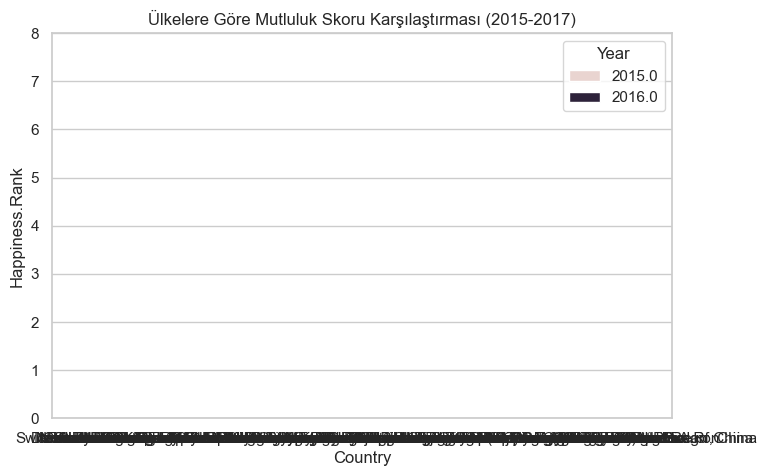

In [69]:
plt.figure(figsize=(8,5))
sns.barplot(data=df, x='Country', y='Happiness.Rank', hue='Year')
plt.title('Ülkelere Göre Mutluluk Skoru Karşılaştırması (2015-2017)')
plt.ylim(0, 8)
plt.show()

In [74]:
# Year sütununu int yapalım
df['Year'] = df['Year'].astype('Int64')  # NaN için nullable int

# Kullanacağımız yıllar (örnek: 2017, 2018, 2019) - elindeki yıllara göre değiştir
years_to_compare = [2017, 2018, 2019]

# İlgili yıllara göre filtrele
df_filtered = df[df['Year'].isin(years_to_compare)]

# Ülke ve yıl bazında ortalama skor alalım (aynı ülkenin birden fazla kaydı olabilir)
df_grouped = df_filtered.groupby(['Country', 'Year'])['Score'].mean().reset_index()

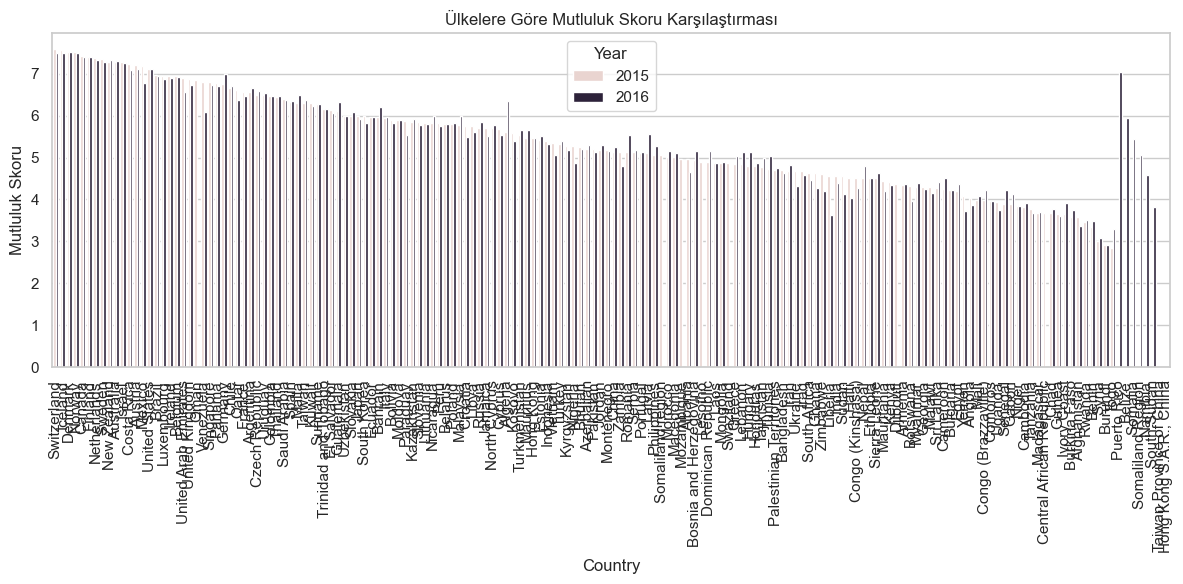

In [75]:
plt.figure(figsize=(12,6))
sns.barplot(data=df, x='Country', y='Score', hue='Year')
plt.xticks(rotation=90)
plt.title('Ülkelere Göre Mutluluk Skoru Karşılaştırması')
plt.ylabel('Mutluluk Skoru')
plt.tight_layout()
plt.show()

In [76]:
# İlgili sütunların isimleri veri setine göre değişebilir, örnek:
factors = {
    'Economy': 'Economy',
    'Social Support': 'Social Support',
    'Health': 'Health',
    'Freedom': 'Freedom',
    'Trust': 'Trust',
    'Generosity': 'Generosity',
    'Overall Score': 'Score'  # ya da Happiness.Score
}

# Örneğin 2016 yılındaki en yüksek değerleri bulalım:
year = 2016
df_year = df[df['Year'] == year]

top_countries = {}

for factor_name, col_name in factors.items():
    max_val = df_year[col_name].max()
    countries = df_year[df_year[col_name] == max_val]['Country'].tolist()
    top_countries[factor_name] = {'Countries': countries, 'Max Value': max_val}

for factor, info in top_countries.items():
    print(f"{factor} - En yüksek: {info['Max Value']} - Ülke(ler): {', '.join(info['Countries'])}")


Economy - En yüksek: 1.82427 - Ülke(ler): Qatar
Social Support - En yüksek: 1.18326 - Ülke(ler): Iceland
Health - En yüksek: 0.95277 - Ülke(ler): Hong Kong
Freedom - En yüksek: 0.60848 - Ülke(ler): Uzbekistan
Trust - En yüksek: 0.50521 - Ülke(ler): Rwanda
Generosity - En yüksek: 0.81971 - Ülke(ler): Myanmar
Overall Score - En yüksek: 7.526 - Ülke(ler): Denmark


In [77]:
years = [2015, 2016]
df_years = df[df['Year'].isin(years)]

# Sadece Country, Year, Score veya Happiness.Score ve Rank sütunlarını alalım
df_compare = df_years[['Country', 'Year', 'Score', 'Rank']].copy()

# Pivotla her ülke için iki yılın değerlerini yan yana koyarız
pivot_score = df_compare.pivot(index='Country', columns='Year', values='Score')
pivot_rank = df_compare.pivot(index='Country', columns='Year', values='Rank')

# Değişim sütunları ekleyelim
pivot_score['Score_Change'] = pivot_score[2016] - pivot_score[2015]
pivot_rank['Rank_Change'] = pivot_rank[2016] - pivot_rank[2015]  # Pozitif değişim sıra kötüleşmesi demek

# Değişimlere göre sıralama yapalım
score_change_sorted = pivot_score.sort_values('Score_Change', ascending=False)
rank_change_sorted = pivot_rank.sort_values('Rank_Change')

print("En çok mutluluk skoru artışı yaşayan ülkeler:")
print(score_change_sorted[['Score_Change']].head(10))

print("\nEn çok mutluluk skoru azalan ülkeler:")
print(score_change_sorted[['Score_Change']].tail(10))

print("\nEn çok sıra iyileşen ülkeler (Rank azalan):")
print(rank_change_sorted[['Rank_Change']].head(10))

print("\nEn çok sıra kötüleşen ülkeler (Rank artan):")
print(rank_change_sorted[['Rank_Change']].tail(10))


En çok mutluluk skoru artışı yaşayan ülkeler:
Year                Score_Change
Country                         
Algeria                    0.750
Togo                       0.464
Latvia                     0.462
Romania                    0.404
Hungary                    0.345
Senegal                    0.315
Tunisia                    0.306
Lebanon                    0.290
Nepal                      0.279
Dominican Republic         0.270

En çok mutluluk skoru azalan ülkeler:
Year               Score_Change
Country                        
Lesotho                     NaN
Mozambique                  NaN
Namibia                     NaN
Oman                        NaN
Puerto Rico                 NaN
Somalia                     NaN
Somaliland Region           NaN
Somaliland region           NaN
South Sudan                 NaN
Swaziland                   NaN

En çok sıra iyileşen ülkeler (Rank azalan):
Year       Rank_Change
Country               
Algeria          -30.0
Latvia           -21.

In [78]:
# Örneğin 0.3 puandan fazla artış veya azalma önemli kabul edelim
threshold = 0.3

significant_increase = score_change_sorted[score_change_sorted['Score_Change'] > threshold]
significant_decrease = score_change_sorted[score_change_sorted['Score_Change'] < -threshold]

print("Önemli mutluluk artışı olan ülkeler:")
print(significant_increase[['Score_Change']])

print("\nÖnemli mutluluk azalışı olan ülkeler:")
print(significant_decrease[['Score_Change']])


Önemli mutluluk artışı olan ülkeler:
Year     Score_Change
Country              
Algeria         0.750
Togo            0.464
Latvia          0.462
Romania         0.404
Hungary         0.345
Senegal         0.315
Tunisia         0.306

Önemli mutluluk azalışı olan ülkeler:
Year                  Score_Change
Country                           
Albania                     -0.304
United Arab Emirates        -0.328
Zambia                      -0.334
Paraguay                    -0.340
Yemen                       -0.353
Ukraine                     -0.357
Ghana                       -0.357
Botswana                    -0.358
Nigeria                     -0.393
Mexico                      -0.409
Sudan                       -0.411
Zimbabwe                    -0.417
Haiti                       -0.490
Venezuela                   -0.726
Liberia                     -0.949


In [83]:
# 1. En yüksek faktörlere sahip ülkeler (2016 örneği)

year = 2016
df_year = df[df['Year'] == year]

factors = {
    'Economy': 'Economy',
    'Social Support': 'Social Support',
    'Health': 'Health',
    'Freedom': 'Freedom',
    'Trust': 'Trust',
    'Generosity': 'Generosity',
    'Overall Score': 'Score'
}

top_values = []
top_countries = []

for factor_name, col_name in factors.items():
    max_val = df_year[col_name].max()
    country = df_year[df_year[col_name] == max_val]['Country'].values[0]
    top_values.append(max_val)
    top_countries.append(country)

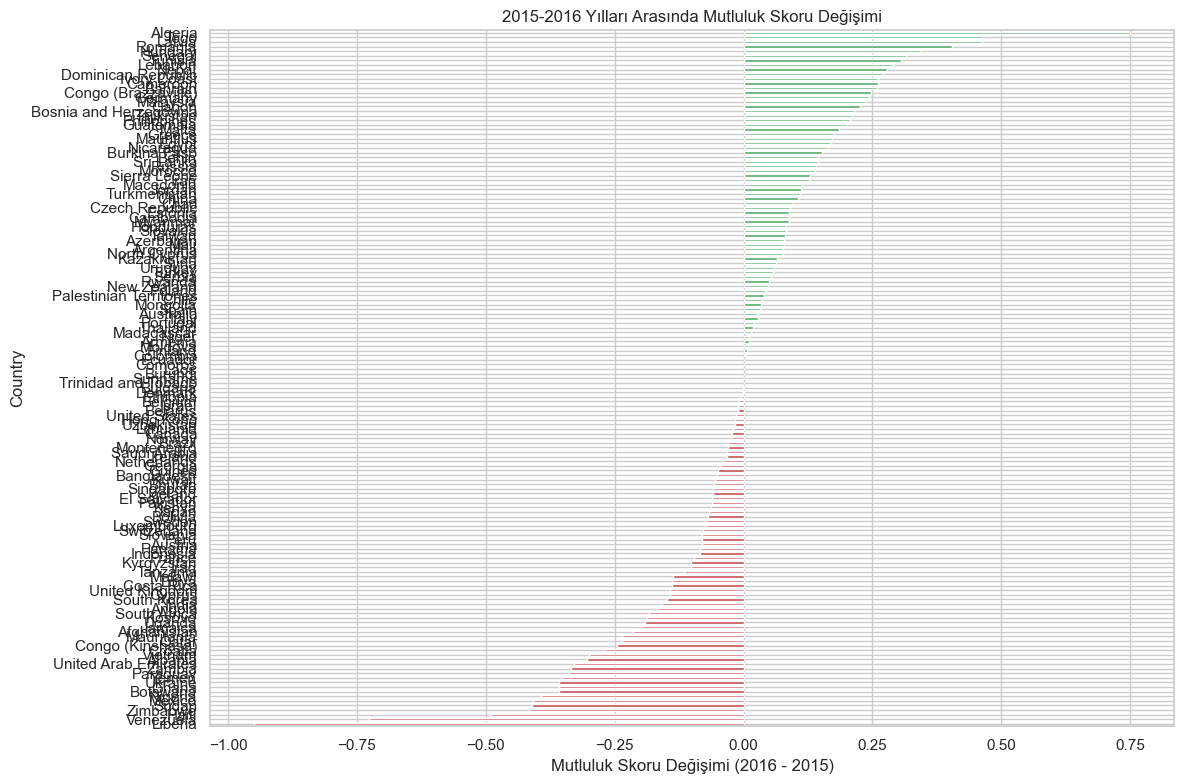

In [84]:
# 2. 2015-2016 ve 2016-2017 Mutluluk Skoru Değişimi (puan farkı)

years_compare = [2015, 2016]

df_filtered = df[df['Year'].isin(years_compare)]
df_grouped = df_filtered.groupby(['Country', 'Year'])['Score'].mean().reset_index()
pivot = df_grouped.pivot(index='Country', columns='Year', values='Score').dropna()

pivot['Score_Change'] = pivot[2016] - pivot[2015]
pivot_sorted = pivot.sort_values('Score_Change')

plt.figure(figsize=(12,8))
pivot_sorted['Score_Change'].plot(kind='barh', color=pivot_sorted['Score_Change'].apply(lambda x: 'g' if x > 0 else 'r'))
plt.xlabel("Mutluluk Skoru Değişimi (2016 - 2015)")
plt.title("2015-2016 Yılları Arasında Mutluluk Skoru Değişimi")
plt.tight_layout()
plt.show()

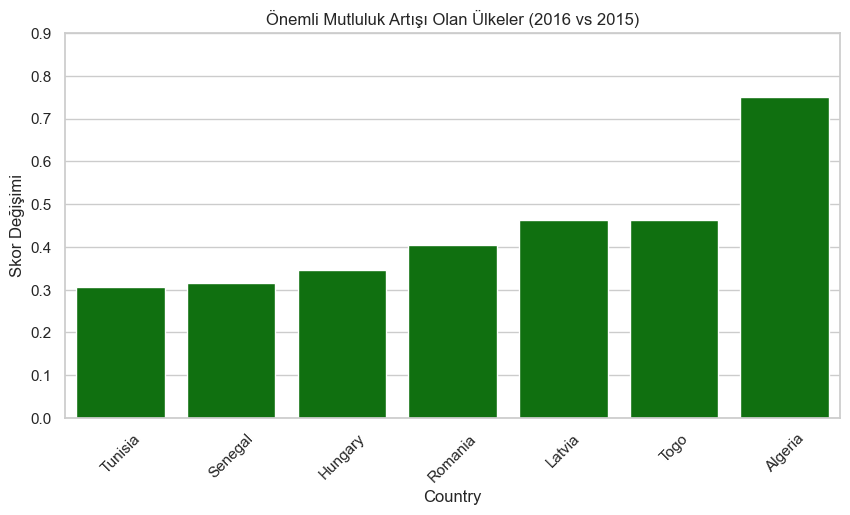

In [85]:
# 3. Önemli artış/azalma yaşayan ülkeler (eşik 0.3)

threshold = 0.3
sig_increase = pivot_sorted[pivot_sorted['Score_Change'] > threshold]
sig_decrease = pivot_sorted[pivot_sorted['Score_Change'] < -threshold]

plt.figure(figsize=(10,5))
sns.barplot(x=sig_increase.index, y=sig_increase['Score_Change'], color='green')
plt.title("Önemli Mutluluk Artışı Olan Ülkeler (2016 vs 2015)")
plt.ylabel("Skor Değişimi")
plt.xticks(rotation=45)
plt.ylim(0, sig_increase['Score_Change'].max()*1.2)
plt.show()

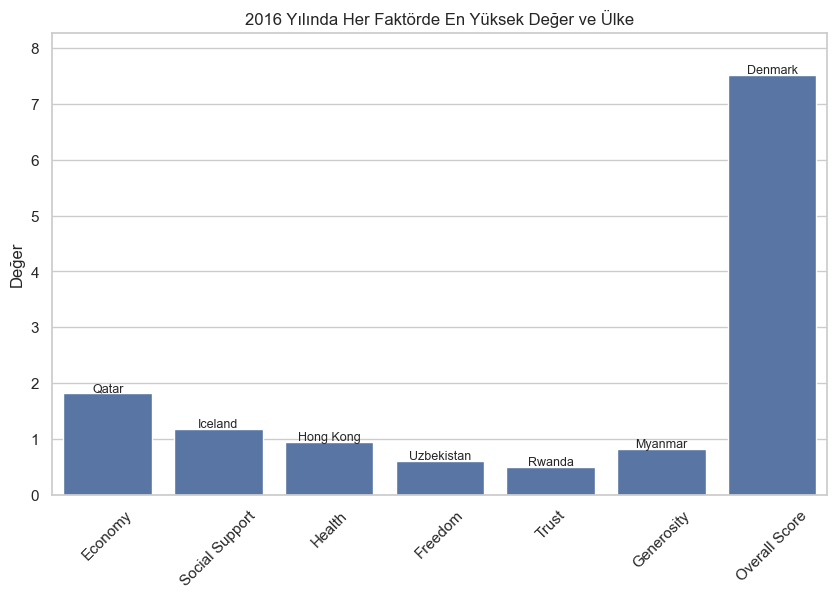

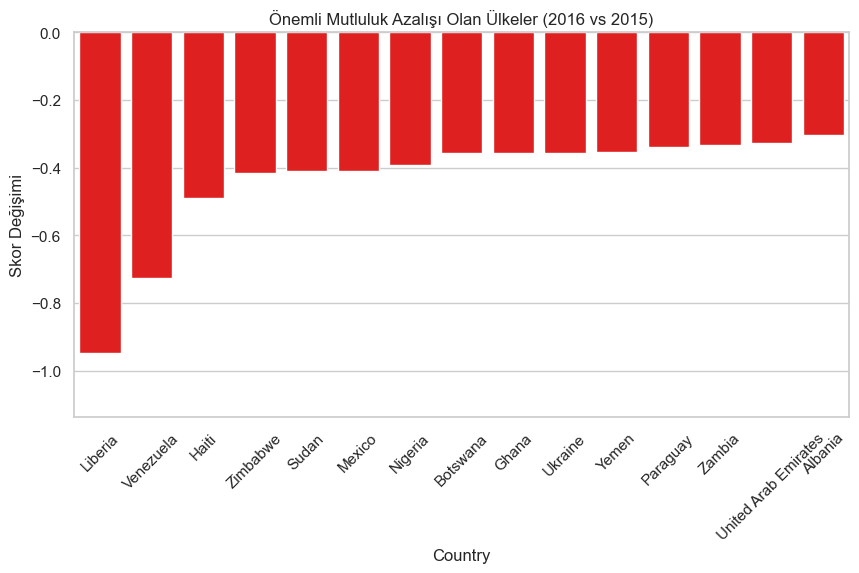

In [86]:

plt.figure(figsize=(10,6))
sns.barplot(x=list(factors.keys()), y=top_values)
for i, country in enumerate(top_countries):
    plt.text(i, top_values[i]+0.02, country, ha='center', fontsize=9)
plt.title(f"{year} Yılında Her Faktörde En Yüksek Değer ve Ülke")
plt.ylabel("Değer")
plt.xticks(rotation=45)
plt.ylim(0, max(top_values)*1.1)
plt.show()

plt.figure(figsize=(10,5))
sns.barplot(x=sig_decrease.index, y=sig_decrease['Score_Change'], color='red')
plt.title("Önemli Mutluluk Azalışı Olan Ülkeler (2016 vs 2015)")
plt.ylabel("Skor Değişimi")
plt.xticks(rotation=45)
plt.ylim(sig_decrease['Score_Change'].min()*1.2, 0)
plt.show()